In [11]:
import os
os.chdir("/home/elias/data_science/automated_data_pipeline")


In [12]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("database/transactions.db")

transactions = pd.read_sql("SELECT * FROM transactions", conn)
details = pd.read_sql("SELECT * FROM transaction_details", conn)

df = pd.merge(details, transactions, on="transaction_id")


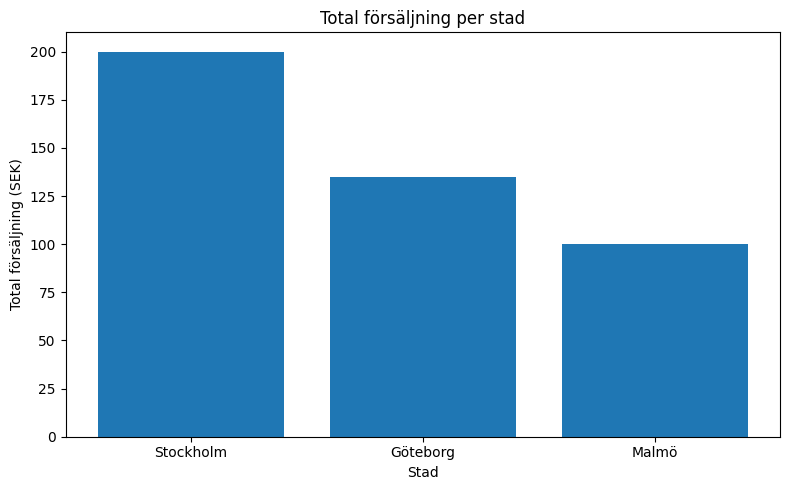

In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("database/transactions.db")
df = pd.read_sql("SELECT * FROM transactions", conn)

# Om store_id saknas (None/NaN), skapa exempel-butiker
if df["store_id"].isna().all():
    df["store_id"] = [1, 2, 3]  # kopplat till dina 3 rader

# Butik -> stad
store_city = {
    1: "Stockholm",
    2: "Göteborg",
    3: "Malmö",
}

df["city"] = df["store_id"].map(store_city)

city_sales = df.groupby("city")["total_amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(city_sales.index, city_sales.values)
plt.title("Total försäljning per stad")
plt.xlabel("Stad")
plt.ylabel("Total försäljning (SEK)")
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd

details = details.copy()

details["product_id"] = details["product_id"].fillna(
    pd.Series(range(1, len(details) + 1), index=details.index)
)


In [32]:
details[["product_id", "quantity"]]
details["product_id"].isna().sum()


np.int64(0)

In [38]:
product_names = {
    1: "Stekpanna",
    2: "Kastrull",
    3: "Knivset",
    4: "Skärbräda",
    5: "Gryta"
}

details = details.copy()

details["product_name"] = details["product_id"].map(product_names)

details[["product_id", "product_name", "quantity"]]



,product_id,product_name,quantity
0,1,Stekpanna,1
1,2,Kastrull,2
2,3,Knivset,1
3,4,Skärbräda,3
4,5,Gryta,1


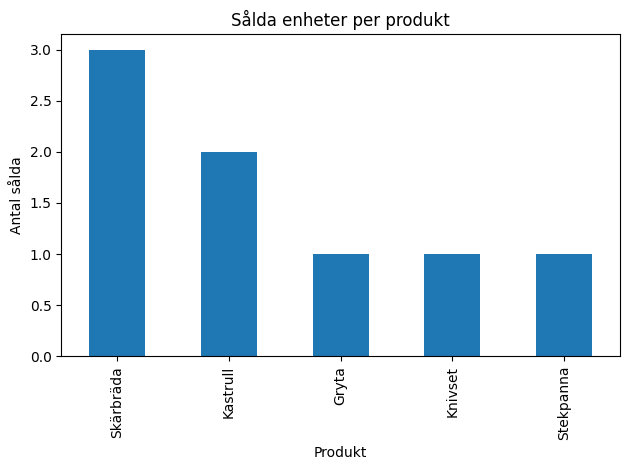

In [40]:
import matplotlib.pyplot as plt

plt.figure()
product_sales.plot(kind="bar")
plt.title("Sålda enheter per produkt")
plt.xlabel("Produkt")
plt.ylabel("Antal sålda")
plt.tight_layout()
plt.show()


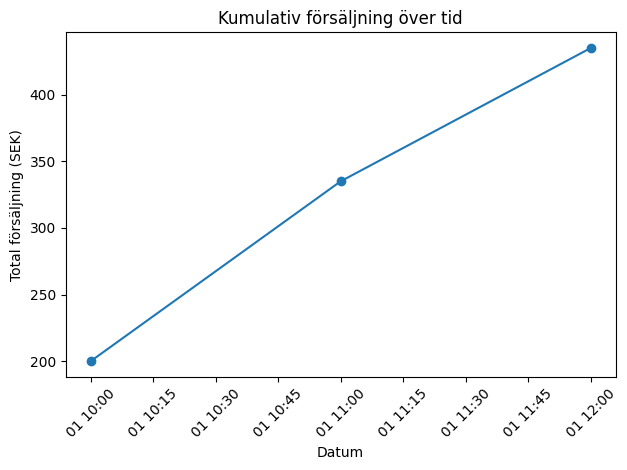

In [ ]:
import matplotlib.pyplot as plt


transactions["transaction_date"] = pd.to_datetime(transactions["transaction_date"])


transactions = transactions.sort_values("transaction_date")


transactions["cumulative_sales"] = transactions["total_amount"].cumsum()


plt.figure()
plt.plot(
    transactions["transaction_date"],
    transactions["cumulative_sales"],
    marker="o"
)

plt.title("Kumulativ försäljning över tid")
plt.xlabel("Datum")
plt.ylabel("Total försäljning (SEK)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
